In [1]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit 

# Please, to run the experiment donwload the following dataset and put it in the /Datasets folder:
# 	- kc_house_data.csv
#       https://www.kaggle.com/harlfoxem/housesalesprediction

filename = "Datasets/kc_house_data.csv"
df = pd.read_csv(filename, header=0) 
df = df.dropna()

print(list(df.columns.values) )

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [2]:
x = df[['bedrooms','sqft_living','sqft_lot','floors', 'sqft_above','sqft_basement','yr_built']]
x = x.to_numpy()
y = df['price']
y = y.to_numpy()
n = x.shape[1]

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(21613, 7)
(21613, 44)
(21613, 36)


In [4]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  0
time =  54.09676799999996 ms
mean time =  54.09676799999996 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  1
time =  49.780449000000004 ms
mean time =  51.93860849999999 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  2
time =  48.26162300000014 ms
mean time =  50.71294666666671 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  3
time =  44.07096299999935 ms
mean time =  49.05245074999987 ms
ERROR: singular cone basis
Using determiinistic Algorithm


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


ERROR: singular cone basis
Using determiinistic Algorithm
sample =  4
time =  48.30107199999922 ms
mean time =  48.90217499999974 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  5
time =  45.02881099999989 ms
mean time =  48.2566143333331 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  6
time =  45.49101599999972 ms
mean time =  47.861528857142616 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  7
time =  45.46016300000044 ms
mean time =  47.56135812499984 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinistic Algorithm
sample =  8
time =  43.864769999999886 ms
mean time =  47.15062611111096 ms
ERROR: singular cone basis
Using determiinistic Algorithm
ERROR: singular cone basis
Using determiinis

In [5]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

sample =  0
time =  44.346736000001385 ms
mean time =  44.346736000001385 ms
sample =  1
time =  45.65546199999915 ms
mean time =  45.001099000000266 ms
sample =  2
time =  48.24483499999843 ms
mean time =  46.08234433333299 ms
sample =  3
time =  40.44446300000004 ms
mean time =  44.67287399999975 ms
sample =  4
time =  39.641149000004816 ms
mean time =  43.666529000000764 ms
sample =  5
time =  42.10544000000027 ms
mean time =  43.406347500000685 ms
sample =  6
time =  37.043119000003344 ms
mean time =  42.49731485714392 ms
sample =  7
time =  41.13804100000351 ms
mean time =  42.32740562500137 ms
sample =  8
time =  39.379071999995574 ms
mean time =  41.99981300000073 ms
sample =  9
time =  36.983438000000035 ms
mean time =  41.498175500000656 ms
sample =  10
time =  37.07728100000196 ms
mean time =  41.09627600000078 ms
sample =  11
time =  37.76473700000338 ms
mean time =  40.81864775000099 ms
sample =  12
time =  36.750907000005384 ms
mean time =  40.50574461538594 ms
sample =  1

In [6]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  129.63006500000063 ms
mean time =  129.63006500000063 ms
sample =  1
time =  128.4965790000001 ms
mean time =  129.06332200000037 ms
sample =  2
time =  130.59091599999562 ms
mean time =  129.57251999999878 ms
sample =  3
time =  122.75260999999915 ms
mean time =  127.86754249999888 ms
sample =  4
time =  129.18784299999686 ms
mean time =  128.13160259999847 ms
sample =  5
time =  122.38875999999976 ms
mean time =  127.17446216666535 ms
sample =  6
time =  128.85555199999743 ms
mean time =  127.41461785714137 ms
sample =  7
time =  122.90125799999885 ms
mean time =  126.85044787499855 ms
sample =  8
time =  125.36105299999889 ms
mean time =  126.68495955555414 ms
sample =  9
time =  122.89638899999744 ms
mean time =  126.30610249999847 ms
sample =  10
time =  126.57562799999766 ms
mean time =  126.3306048181802 ms
sample =  11
time =  122.93606299999738 ms
mean time =  126.04772633333164 ms
sample =  12
time =  125.1957939999997 ms
mean time =  125.98219307692149 ms

In [7]:
time_combined = np.array(time_combined)
time_MT = np.array(time_MT)
time_FC = np.array(time_FC)

print("mean time combined = ", np.mean(time_combined))
print("mean time_MT = ", np.mean(time_MT))
print("mean time_FC = ", np.mean(time_FC))

np.set_printoptions(precision=1)

mean time combined =  46.94478031400008
mean time_MT =  37.81552644000037
mean time_FC =  125.77016483000058


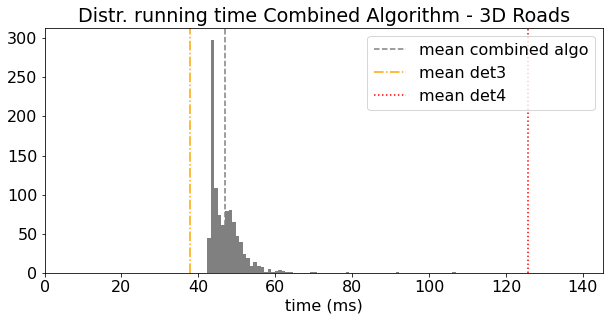

In [10]:
import matplotlib.pyplot as plt

maximum = max(np.mean(time_MT),np.mean(time_FC),np.mean(time_combined))*1.5

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(figsize=(10,4.5))

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='--', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle=':', color="red", label="mean det4")
plt.xlim((0, maximum/1.3))

plt.legend()
plt.title('Distr. running time Combined Algorithm - House sales')
plt.xlabel('time (ms)')

# plt.savefig('Distrib_running_time_housesales_combined.pdf')#, bbox_inches='tight')
plt.show()